In [1]:
import sys
sys.path.insert(0, './python_lib')
import networkx as nx
import numpy as np
import graph_gen
import model
import imp
imp.reload(model)
import random
from collections import defaultdict
import torch
import math

In [2]:
%matplotlib inline

In [3]:
import random
rand=True

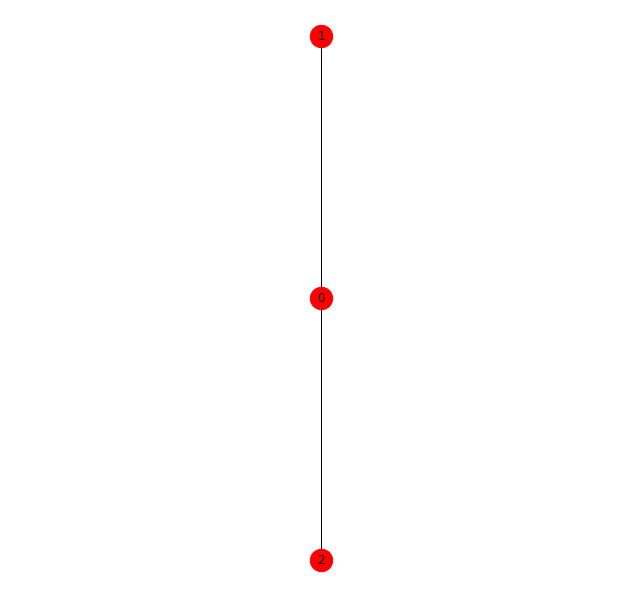

In [24]:
import imp 
imp.reload(graph_gen)
Degree = 3 # degree
Height = 1 # Height of the tree
N, J_interaction = graph_gen.tree_interaction(Degree,Height, rand=False)
j = graph_gen.fixed_value(1)
J = graph_gen.set_J(J_interaction, j)
h = 0.0001
H = np.full((N,), h)
tree = model.model(N, H, J, J_interaction)

In [25]:
import bp_nn
imp.reload(bp_nn)
net = bp_nn.bp_nn(N, tree, True)
result_tree = net.train()

Total number of trainable parameters: 12
 -0.982 0.000 0.002 0.460 -0.522 0.0
free_energy: -0.982,  std_fe: 0.000, mag_mean: -0.005, entropy: 0.474 energy: -0.509 weight: 0.00

In [39]:
import bp_nn
imp.reload(bp_nn)
net2 = bp_nn.bp_nn2(N, tree, True)
result_tree2 = net2.train()

Total number of trainable parameters: 17
 -0.851 0.279 -0.628 0.588 -0.263 -0.0
free_energy: -0.859,  std_fe: 0.262, mag_mean: -0.642, entropy: 0.572 energy: -0.287 weight: -0.00

In [35]:
net2.forward(torch.Tensor([0,1,0]))

tensor([0.2463, 0.2643, 0.2663], grad_fn=<SigmoidBackward>)

In [30]:
J_interaction.sum()/2

2.0

In [94]:
torch.Tensor(N_E)

tensor([[1., 0., 0.],
        [1., 0., 0.]])

In [100]:
N_E.shape

(2, 3)

In [101]:
a.mask

tensor([[1., 0., 0.],
        [1., 0., 0.]])

In [95]:
import torch.nn as nn
a = nn.Linear(N,int(J_interaction.sum()/2))
N_E = []
for r_i, row in enumerate(J_interaction):
    for c_i, val in enumerate(row):
        if c_i < r_i and val != 0:
            inter_e = [0]*N
            inter_e[c_i] = 1
            print(r_i,c_i, val, inter_e)
            N_E.append(inter_e)
N_E = np.array(N_E)
N_E, np.transpose(N_E)
a.register_buffer('mask', torch.Tensor(N_E))
a.weight.data *= a.mask
a.weight.data

1 0 1.0 [1, 0, 0]
2 0 1.0 [1, 0, 0]


tensor([[ 0.0331, -0.0000, -0.0000],
        [-0.3173,  0.0000,  0.0000]])

In [86]:
J_interaction

array([[0., 1., 1.],
       [1., 0., 0.],
       [1., 0., 0.]])

In [93]:
N_E = []
for r_i, row in enumerate(J_interaction):
    for c_i, val in enumerate(row):
        if c_i < r_i and val != 0:
            inter_e = [0]*N
            inter_e[c_i] = 1
            print(r_i,c_i, val, inter_e)
            N_E.append(inter_e)
N_E = np.array(N_E)
N_E, np.transpose(N_E)

1 0 1.0 [1, 0, 0]
2 0 1.0 [1, 0, 0]


(array([[1, 0, 0],
        [1, 0, 0]]), array([[1, 1],
        [0, 0],
        [0, 0]]))

In [85]:
a.weight.data

tensor([[-0.0017,  0.4274, -0.3369],
        [ 0.5304,  0.1198,  0.3463]])

In [68]:
net.net[0].bias

Parameter containing:
tensor([0.0005, 0.0002, 0.0002], requires_grad=True)

In [61]:
z=torch.zeros(
            [1, 1, N])

In [65]:
net.forward(z)

tensor([[[0.5001, 0.5001, 0.5001]]], grad_fn=<SigmoidBackward>)

In [53]:
net = bp_nn.bp_nn(1,1,N, tree, True)
result_tree = net.train()

Total number of trainable parameters: 12
 -1.681 0.004 0.972 0.071 -1.611 0.0
free_energy: -1.681,  std_fe: 0.012, mag_mean: 0.966, entropy: 0.081 energy: -1.601 weight: 0.00

In [54]:
net.net[0].weight

Parameter containing:
tensor([[0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, -0.0000],
        [1.9904, 1.9955, 0.0000]], requires_grad=True)

In [55]:
net.net[0].bias

Parameter containing:
tensor([3.8105, 3.8266, 2.0087], requires_grad=True)

In [75]:
a = net.net[0]
a.bias

Parameter containing:
tensor([-2.8640e-04, -6.1370e-03, -3.9533e-03,  5.7749e-03,  8.2224e-04,
         5.3187e-05,  3.6781e-03], requires_grad=True)

In [76]:
a.weight.data

tensor([[0.0000, -0.0000, 0.0000, -0.0000, -0.0000, -0.0000, 0.0000],
        [0.0000, -0.0000, -0.0000, 0.0000, -0.0000, -0.0000, 0.0000],
        [-0.0000, 2.0034, -0.0000, 0.0000, -0.0000, 0.0000, -0.0000],
        [0.0000, 2.0010, -0.0000, -0.0000, -0.0000, 0.0000, 0.0000],
        [2.0038, 0.0000, -0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [1.9996, 1.9960, 0.0000, 0.0000, 0.0000, -0.0000, 0.0000],
        [1.9968, -0.0000, 0.0000, 0.0000, -0.0000, -0.0000, -0.0000]])

# Grid

In [20]:
m = n = l = 4 # L of square grid

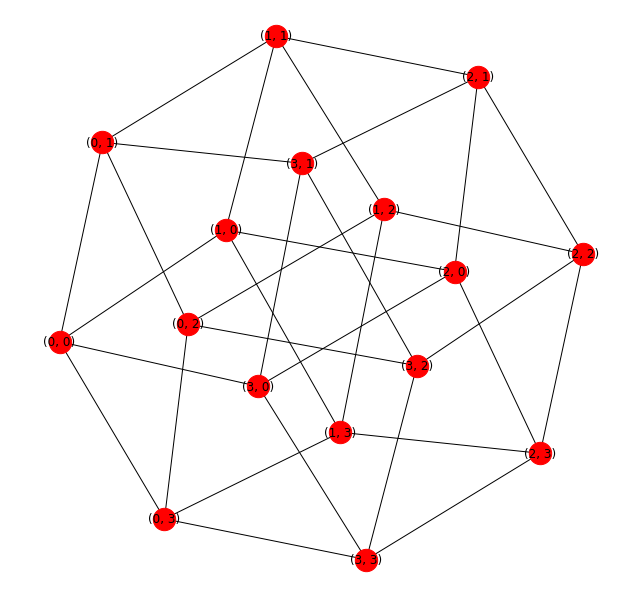

In [21]:
periodic = True
N, J_interaction = graph_gen.grid_2d_interaction(n,m, periodic=periodic)

In [26]:
j = graph_gen.fixed_value(1)
J = graph_gen.set_J(J_interaction, j)
h = 0.
H = np.full((N,), h)
beta = 2

In [27]:
grid_2d = model.model(N, H, J, J_interaction, beta)

In [28]:
import bp_nn
imp.reload(bp_nn)
net_grid = bp_nn.bp_nn(1,1,N, grid_2d, True)


In [30]:
result_grid = net_grid.train(batch_size=10000, batch_mean = 100000, )

Total number of trainable parameters: 272
 -2.000 0.000 0.999 0.003 -1.997 -0.0
free_energy: -2.000,  std_fe: 0.001, mag_mean: 0.999, entropy: 0.003 energy: -1.997 weight: -0.00